<a href="https://colab.research.google.com/github/sandeeptuluri/Projects/blob/main/CNN_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_cat_train = to_categorical(y_train,10)

In [ ]:
y_cat_test = to_categorical(y_test)

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import MaxPool2D,Dense,Conv2D,Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(kernel_size=(4,4),input_shape=(32,32,3),
                 activation='relu',filters=32))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(kernel_size=(4,4),input_shape=(32,32,3),
                 activation='relu',filters=32))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(x_train,y_cat_train,epochs=10,
          validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.7069 - accuracy: 0.3710 - val_loss: 1.3052 - val_accuracy: 0.5356
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.2014 - accuracy: 0.5737 - val_loss: 1.1328 - val_accuracy: 0.5997
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0416 - accuracy: 0.6368 - val_loss: 1.1065 - val_accuracy: 0.6226
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9168 - accuracy: 0.6814 - val_loss: 1.1029 - val_accuracy: 0.6164
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8263 - accuracy: 0.7108 - val_loss: 0.9942 - val_accuracy: 0.6609
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7488 - accuracy: 0.7390 - val_loss: 0.9896 - val_accuracy: 0.6629
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6663 - accuracy: 0.7682 - val_loss: 0.9957 -

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

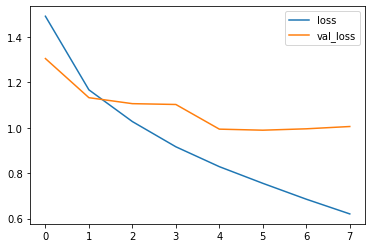

In [ ]:
metrics[['loss','val_loss']].plot()

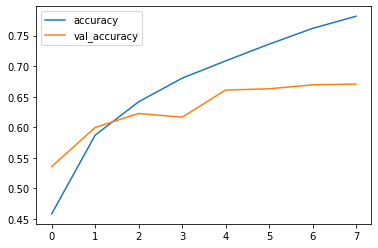

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.0058165788650513, 0.6707000136375427]

In [ ]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1000
           1       0.71      0.85      0.77      1000
           2       0.66      0.47      0.55      1000
           3       0.44      0.54      0.48      1000
           4       0.65      0.60      0.62      1000
           5       0.58      0.55      0.56      1000
           6       0.75      0.74      0.74      1000
           7       0.71      0.77      0.74      1000
           8       0.83      0.71      0.76      1000
           9       0.69      0.81      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000



In [ ]:
print(confusion_matrix(y_test,predictions))

[[675  55  54  33  27  10  12  17  54  63]
 [ 10 851   2   6   2   4  12   2  14  97]
 [ 63  19 473 120  95  79  72  44  17  18]
 [ 15  20  47 540  58 176  55  43  12  34]
 [ 15  12  57  95 596  40  62 103  11   9]
 [ 13  15  29 236  41 547  20  73   9  17]
 [  6  14  24 106  45  29 740  12   9  15]
 [ 11  15  18  64  36  41   9 766   7  33]
 [ 72  86   9  20  11   9   5   8 709  71]
 [ 15 113   5  18   3   3   5  11  17 810]]


In [ ]:
import seaborn as sns

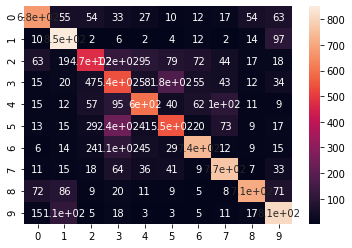

In [ ]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [ ]:
image = x_test[0]

In [ ]:
x_test.shape

(10000, 32, 32, 3)

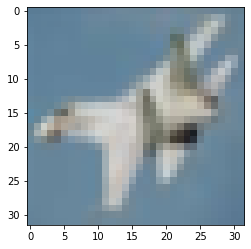

In [ ]:
plt.imshow(x_test[10])

In [ ]:
y_test[0]

array([3], dtype=uint8)

In [ ]:
model.predict_classes(image.reshape(1,32,32,3))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3])